In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

# Define the number of samples
num_samples = 1000

# Generate synthetic data
np.random.seed(42)
data = {
    "LoanID": [f"LN{100000 + i}" for i in range(num_samples)],
    "Age": np.random.randint(21, 65, num_samples),
    "Income": np.random.randint(20000, 150000, num_samples),
    "LoanAmount": np.random.randint(5000, 50000, num_samples),
    "CreditScore": np.random.randint(300, 850, num_samples),
    "MonthsEmployed": np.random.randint(0, 480, num_samples),
    "NumCreditLines": np.random.randint(1, 10, num_samples),
    "InterestRate": np.random.uniform(2.5, 15.0, num_samples).round(2),
    "LoanTerm": np.random.choice([12, 24, 36, 48, 60], num_samples),
    "DTIRatio": np.random.uniform(0.1, 0.6, num_samples).round(2),
    "Education": np.random.choice(["High School", "Bachelor's", "Master's", "PhD"], num_samples),
    "EmploymentType": np.random.choice(["Salaried", "Self-Employed"], num_samples),
    "MaritalStatus": np.random.choice(["Single", "Married", "Divorced", "Widowed"], num_samples),
    "HasMortgage": np.random.choice(["Yes", "No"], num_samples),
    "HasDependents": np.random.choice(["Yes", "No"], num_samples),
    "LoanPurpose": np.random.choice(["Home", "Auto", "Personal", "Business"], num_samples),
    "HasCoSigner": np.random.choice(["Yes", "No"], num_samples),
    "Default": np.random.choice(["Yes", "No"], num_samples, p=[0.15, 0.85])  # 15% default rate
}

# Create DataFrame
loan_df = pd.DataFrame(data)

# Save to CSV
loan_df.to_csv("synthetic_loan_data.csv", index=False)

print("Dataset saved as synthetic_loan_data.csv")


Dataset saved as synthetic_loan_data.csv


In [4]:
df=pd.read_csv("synthetic_loan_data.csv")

In [5]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,LN100000,59,24018,16536,842,64,3,6.65,24,0.30,PhD,Self-Employed,Single,No,Yes,Auto,No,No
1,LN100001,49,31302,33541,847,336,3,12.27,24,0.28,High School,Self-Employed,Single,No,No,Business,Yes,No
2,LN100002,35,87506,18547,707,450,4,7.96,60,0.49,PhD,Self-Employed,Widowed,Yes,Yes,Business,No,No
3,LN100003,63,61157,39531,713,473,5,10.35,24,0.50,Bachelor's,Self-Employed,Widowed,Yes,Yes,Auto,No,Yes
4,LN100004,28,74917,13712,641,270,1,10.59,36,0.18,Bachelor's,Self-Employed,Single,No,No,Home,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,LN100995,53,72098,18493,375,180,2,7.56,24,0.30,High School,Self-Employed,Single,No,No,Business,No,No
996,LN100996,22,35251,22069,474,214,2,2.53,48,0.29,High School,Self-Employed,Married,Yes,No,Personal,Yes,No
997,LN100997,34,142413,12531,408,87,2,13.12,24,0.50,High School,Salaried,Widowed,No,No,Home,Yes,No
998,LN100998,60,20526,42051,482,255,7,7.26,60,0.33,Bachelor's,Self-Employed,Widowed,Yes,Yes,Auto,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          1000 non-null   object 
 1   Age             1000 non-null   int64  
 2   Income          1000 non-null   int64  
 3   LoanAmount      1000 non-null   int64  
 4   CreditScore     1000 non-null   int64  
 5   MonthsEmployed  1000 non-null   int64  
 6   NumCreditLines  1000 non-null   int64  
 7   InterestRate    1000 non-null   float64
 8   LoanTerm        1000 non-null   int64  
 9   DTIRatio        1000 non-null   float64
 10  Education       1000 non-null   object 
 11  EmploymentType  1000 non-null   object 
 12  MaritalStatus   1000 non-null   object 
 13  HasMortgage     1000 non-null   object 
 14  HasDependents   1000 non-null   object 
 15  LoanPurpose     1000 non-null   object 
 16  HasCoSigner     1000 non-null   object 
 17  Default         1000 non-null   ob

In [7]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns=df.columns.str.strip()

In [10]:
df=df.drop(columns=['NumCreditLines','DTIRatio','HasCoSigner','HasDependents','MaritalStatus'])

In [11]:
df.describe() 

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.515000,84948.514000,28337.73700,580.832000,243.385000,8.632850,35.868000
std,12.611059,37780.679355,12703.89062,158.370253,139.059787,3.568578,16.837877
min,21.000000,20060.000000,5105.00000,300.000000,1.000000,2.510000,12.000000
25%,32.000000,52376.000000,17108.00000,446.000000,123.000000,5.547500,24.000000
50%,43.000000,84256.000000,29714.00000,578.000000,244.500000,8.610000,36.000000
75%,53.000000,117426.750000,39051.75000,720.250000,368.000000,11.730000,48.000000
max,64.000000,149972.000000,49976.00000,849.000000,479.000000,14.970000,60.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          1000 non-null   object 
 1   Age             1000 non-null   int64  
 2   Income          1000 non-null   int64  
 3   LoanAmount      1000 non-null   int64  
 4   CreditScore     1000 non-null   int64  
 5   MonthsEmployed  1000 non-null   int64  
 6   InterestRate    1000 non-null   float64
 7   LoanTerm        1000 non-null   int64  
 8   Education       1000 non-null   object 
 9   EmploymentType  1000 non-null   object 
 10  HasMortgage     1000 non-null   object 
 11  LoanPurpose     1000 non-null   object 
 12  Default         1000 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 101.7+ KB


<Axes: xlabel='Default', ylabel='count'>

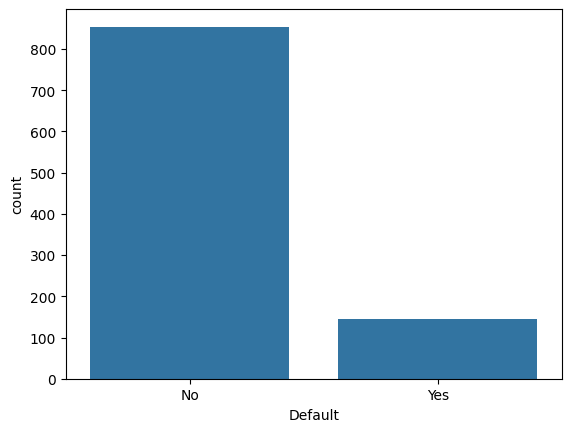

In [13]:
sns.countplot(x=df['Default']) 


<Axes: xlabel='Default', ylabel='CreditScore'>

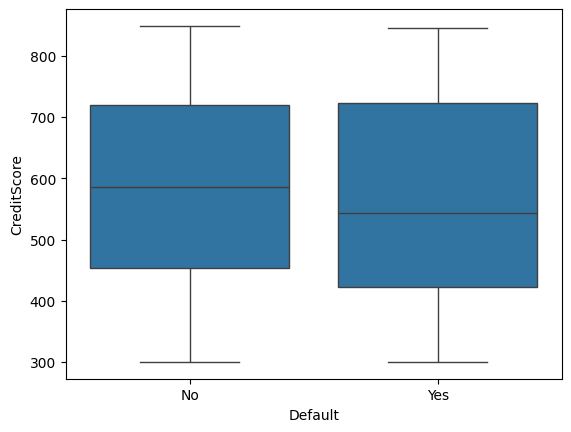

In [14]:
sns.boxplot(x=df['Default'],y=df['CreditScore']) 


In [15]:
categorical_column=['Education','EmploymentType','LoanPurpose','HasMortgage']
num_col=['Age','Income','LoanAmount','CreditScore','MonthsEmployed','InterestRate','LoanTerm']

In [16]:
X = df.drop(columns=['Default', 'LoanID'], errors='ignore')
y=df['Default']

In [17]:
X.shape

(1000, 11)

In [18]:
y.value_counts


<bound method IndexOpsMixin.value_counts of 0       No
1       No
2       No
3      Yes
4       No
      ... 
995     No
996     No
997     No
998     No
999    Yes
Name: Default, Length: 1000, dtype: object>

In [19]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_column),
    ('num', StandardScaler(), num_col),
], remainder='passthrough')

In [20]:
X_processed = preprocessor.fit_transform(X)

In [21]:
X_processed.shape

(1000, 15)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_processed,y,test_size=0.3)

In [23]:
X_train.shape


(700, 15)

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.8666666666666667

              precision    recall  f1-score   support

          No       0.87      1.00      0.93       260
         Yes       0.00      0.00      0.00        40

    accuracy                           0.87       300
   macro avg       0.43      0.50      0.46       300
weighted avg       0.75      0.87      0.80       300



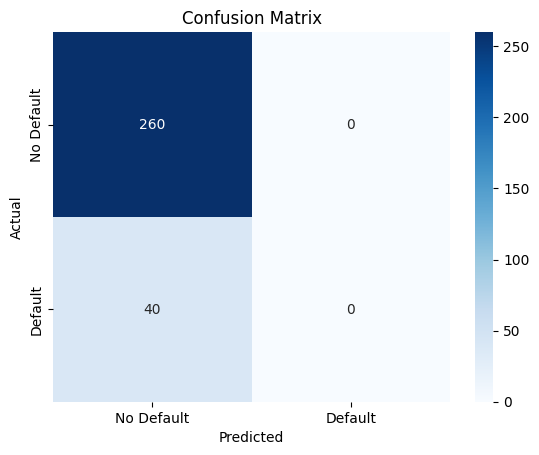

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues", xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [29]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'InterestRate', 'LoanTerm', 'Education',
       'EmploymentType', 'HasMortgage', 'LoanPurpose', 'Default'],
      dtype='object')

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined